### Training And Testing Available Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('carprices.csv')
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


#### Car Mileage Vs Sell Price ($)

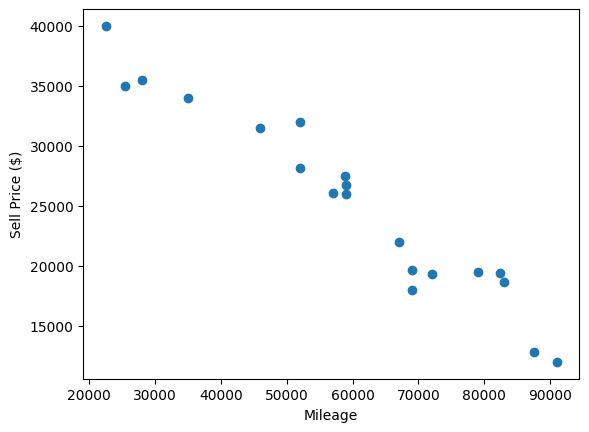

In [6]:
plt.xlabel('Mileage')
plt.ylabel('Sell Price ($)')
plt.scatter(df['Mileage'],df['Sell Price($)'])


#### Car Age Vs Sell Price ($)

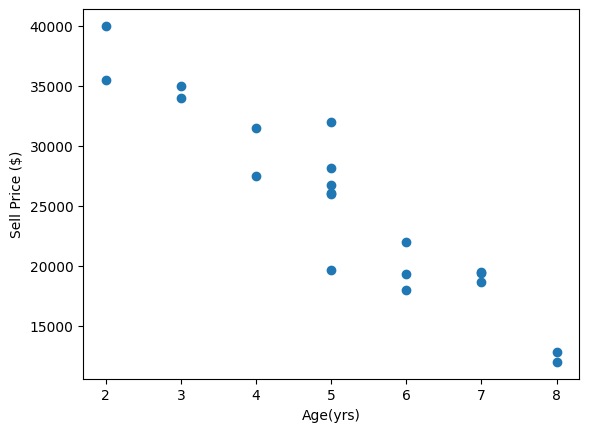

In [7]:
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price ($)')
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])


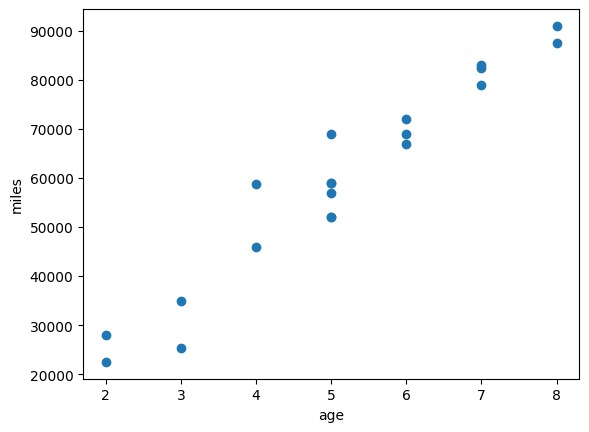

In [8]:
plt.ylabel("miles")
plt.xlabel("age")
plt.scatter(df['Age(yrs)'],df['Mileage'])

Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)

The approach we are going to use here is to split available data in two sets

Training: We will train our model on this dataset
Testing: We will use this subset to make actual predictions using trained model
The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.

In [9]:
x = df[['Mileage','Age(yrs)']]
x

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [10]:
y = df['Sell Price($)']
y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,26750
6,32000
7,19300
8,12000
9,22000


x : features ( to be trained )
x train x test
y : result ( to be predicted )

y train y test

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [13]:
x_train

,Mileage,Age(yrs)
18,87600,8
5,59000,5
6,52000,5
4,46000,4
3,22500,2
12,59000,5
9,67000,6
8,91000,8
2,57000,5
10,83000,7


In [14]:
x_test

,Mileage,Age(yrs)
7,72000,6
17,69000,5
19,52000,5
1,35000,3


In [15]:
y_train

,Sell Price($)
18,12800
5,26750
6,32000
4,31500
3,40000
12,26000
9,22000
8,12000
2,26100
10,18700


In [16]:
y_test

,Sell Price($)
7,19300
17,19700
19,28200
1,34000


In [23]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)  # actual training ( learn )

LinearRegression()

In [24]:
x_test

,Mileage,Age(yrs)
7,72000,6
17,69000,5
19,52000,5
1,35000,3


In [25]:
clf.predict(x_test)

array([21314.63182302, 23506.56963178, 27539.62939698, 34533.1319214 ])

In [26]:
result = clf.predict(x_test)
result

array([21314.63182302, 23506.56963178, 27539.62939698, 34533.1319214 ])

In [27]:
y_test

,Sell Price($)
7,19300
17,19700
19,28200
1,34000


In [29]:
clf.score(x_test,y_test)   # training accuracy

0.8727780752487848

In [31]:
clf.score(x_test, y_test) # test accuracy

0.8727780752487848

#### random_state argument

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=11)

In [35]:
x_test

,Mileage,Age(yrs)
3,22500,2
5,59000,5
10,83000,7
6,52000,5
14,82450,7


In [37]:
clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression()

In [39]:
clf.score(x_train, y_train)

0.9566522751819245

In [38]:
clf.score(x_test, y_test)

0.8384929507498585

In [40]:
print(df["Mileage"].mean())
df["Mileage"].std()

59736.5


20595.441824524387

In [41]:
print(df["Age(yrs)"].mean())
df["Age(yrs)"].std()

5.15


1.7851728502481652

In [42]:
for i in df.columns[:2]:
    print(i)
    print(df[i].mean())
    print(df[i].std())
    print()

Mileage
59736.5
20595.441824524387

Age(yrs)
5.15
1.7851728502481652



In [43]:
df.describe()

,Mileage,Age(yrs),Sell Price($)
count,20.000000,20.000000,20.000000
mean,59736.500000,5.150000,25197.500000
std,20595.441825,1.785173,7834.479713
min,22500.000000,2.000000,12000.000000
25%,50500.000000,4.000000,19375.000000
50%,59000.000000,5.000000,26050.000000
75%,73750.000000,6.250000,31625.000000
max,91000.000000,8.000000,40000.000000
